In [1]:
import qiskit

In [3]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

In [25]:
import numpy as np
np.random.seed(99999)

params = np.random.rand(3)

In [33]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(1)

# # Add a CX (CNOT) gate on control qubit 0 and target qubit 1
# circuit.cx(0, 1)
circuit.u3(params[0],params[1],params[2],0)
circuit.u3(params[0],params[1],params[2],1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'00': 404, '01': 6, '10': 586, '11': 4}


┌─────────────────────────────┐                               ┌─┐   
q_0: ┤ U3(0.20707,0.98817,0.82692) ├───────────────────────────────┤M├───
     └────────────┬───┬────────────┘┌─────────────────────────────┐└╥┘┌─┐
q_1: ─────────────┤ H ├─────────────┤ U3(0.20707,0.98817,0.82692) ├─╫─┤M├
                  └───┘             └─────────────────────────────┘ ║ └╥┘
c: 2/═══════════════════════════════════════════════════════════════╩══╩═
                                                                    0  1

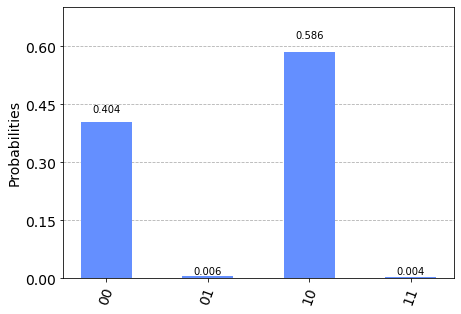

In [34]:
plot_histogram(counts)

In [35]:
counts['00']

404

In [32]:
counts

{'00': 456, '01': 1, '10': 540, '11': 3}